In [9]:
import qubic.pygsti.qupig as qupig
from importlib import reload
import pygsti
import qubic.job_manager_jpm as job_manager
from pygsti.models import modelconstruction as _mc
import chipcalibration.rpe as _rpe
import chipcalibration.config as cfg
import numpy as np

In [10]:
reload(_rpe)

<module 'chipcalibration.rpe' from '/home/jpmarceaux/chipcalibration/chipcalibration/rpe.py'>

In [11]:
# make the processor spec
register = ['Q2'] # these correspond to the actual qubit id's on the qubic device
gate_names = ['Gxpi2', 'Gzpi2']

availability = {
    'Gxpi2': [(qid, ) for qid in register],
    'Gzpi2': [(qid, ) for qid in register],
}

pspec = pygsti.processors.QubitProcessorSpec(num_qubits=len(register), gate_names=gate_names,
                                 availability=availability, qubit_labels=register)

In [12]:
# make a pygsti simulation manager
model = _mc.create_explicit_model(pspec)
model.set_all_parameterizations('TP')
model = model.depolarize(0.1)
sim_manager = job_manager.SimulationManager(model)

In [13]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)

In [14]:
rpe = _rpe.RpeX90(pspec, register[0], 13)

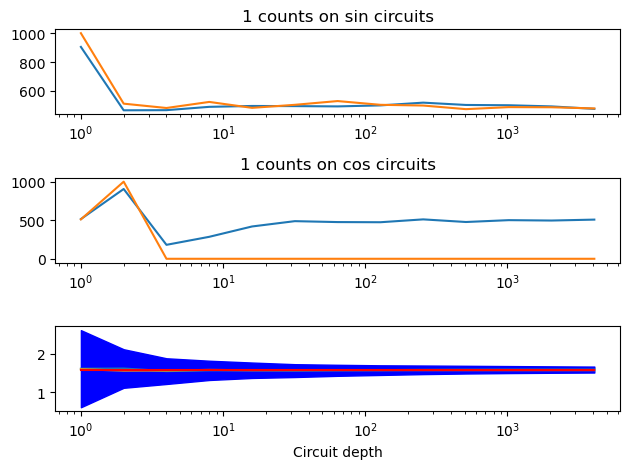

Last good generation: 7
Estimated phase: 1.5707963267948966


In [15]:
results = rpe.run_and_report(sim_manager, 1000, qchip)

In [16]:
results.angle_estimates

array([1.60781644, 1.61267344, 1.54502592, 1.56498656, 1.56771241,
       1.5584591 , 1.56636204, 1.57079633, 1.57898223, 1.5833215 ,
       1.58536914, 1.58562263, 1.58567409])